In [73]:

%load_ext autoreload
%autoreload 2

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from ds_project.utils import generate_test_data
from ds_project.spline_model import SplineModel



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
df = generate_test_data()

<Axes: xlabel='year'>

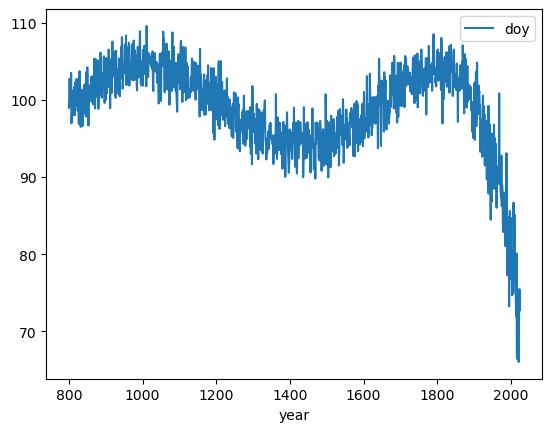

In [75]:
df.plot.line(x='year', y='doy')

In [76]:
model = SplineModel(
    data=df,
    xcols=["year"],
    ycol="doy"
)

2024


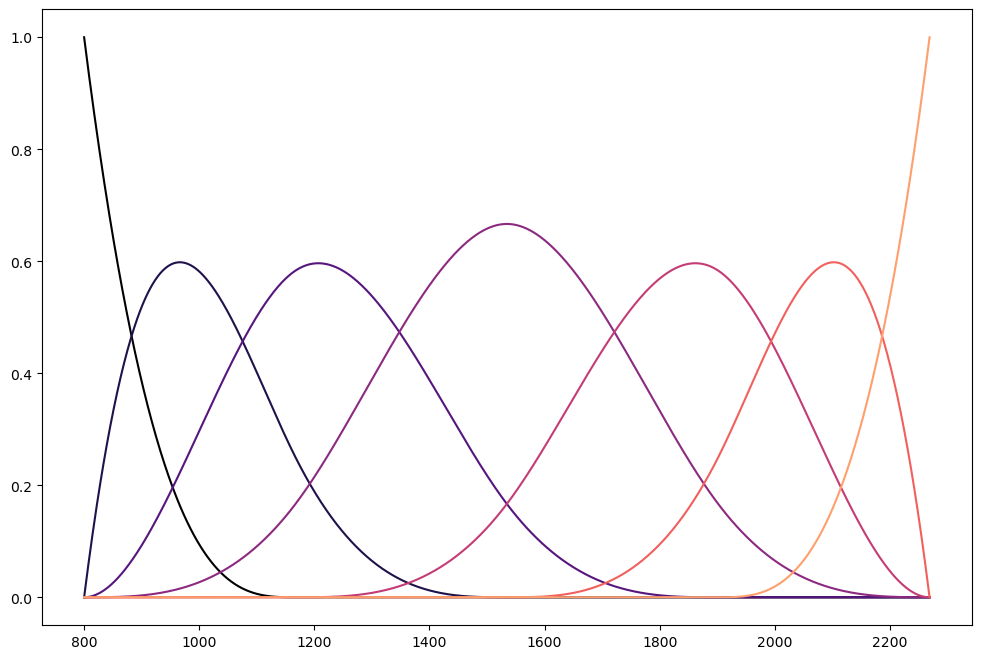

In [77]:
model.visualise_design_matrix("year")

In [78]:
model.fit()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, spline_weight_sd_year, spline_weights_year, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 9 seconds.
Sampling: []


Output()

Sampling: []


Output()

2024


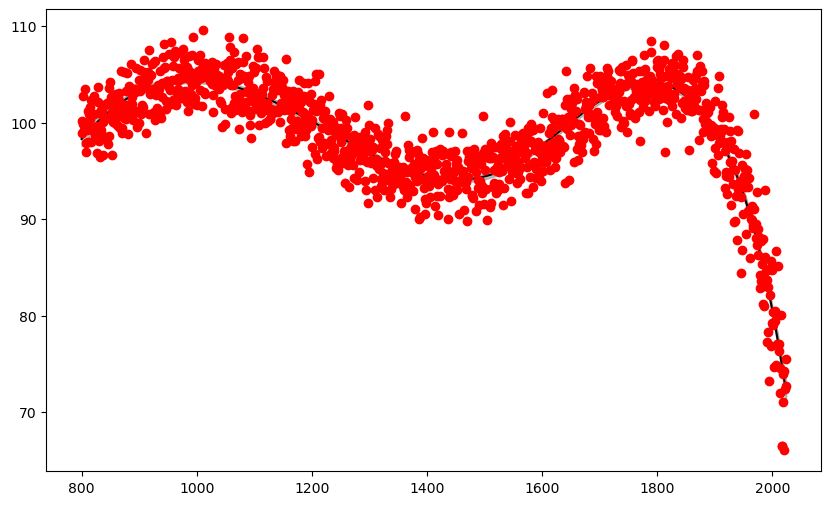

In [ ]:
fig, ax  = model.conditional_effects("year", df)


In [80]:
fig, ax  = model.conditional_effects("temp")
ax.plot(df["temp"], df["conditional_temp_effect"], "o", label="Observed Data", color="red")



ValueError: x temp not found in config

In [54]:
import arviz as az

az.summary(model.idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.614,0.899,-1.317,2.155,0.132,0.087,51.0,1277.0,1.16
spline_weights_year[0],8.294,15.242,-3.962,21.314,3.844,7.601,25.0,18.0,1.11
spline_weights_year[1],17.422,15.233,4.869,30.230,3.860,7.585,23.0,18.0,1.11
spline_weights_year[2],12.128,15.276,-0.426,25.144,3.849,7.611,25.0,18.0,1.10
spline_weights_year[3],-1.776,15.190,-14.129,11.009,3.848,7.571,23.0,18.0,1.11
...,...,...,...,...,...,...,...,...,...
mu[1220],74.142,0.428,73.317,74.934,0.070,0.009,39.0,463.0,1.06
mu[1221],69.866,0.714,68.479,71.214,0.066,0.052,103.0,883.0,1.04
mu[1222],77.338,0.436,76.545,78.140,0.108,0.016,16.0,184.0,1.16
mu[1223],76.229,0.432,75.419,77.005,0.103,0.016,18.0,200.0,1.15
